In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

# 500 most-traded stocks

In [3]:
df_vol = pd.read_csv("return/CRSP data.csv")
# CRSP / Annual Update / Stock / Security Files / Daily Stock File
# settings : HEXCD = 3(NASDAQ), time range = 2019-01-01 to 2023-12-29

In [4]:
df_vol.query("TICKER.notnull()", inplace = True)
df_vol.query("RET != 'C'", inplace = True)
df_vol['RET'] = df_vol['RET'].astype(float)

In [7]:
df_vol

,date,TICKER,VOL,RET
0,2019-01-02,JJSF,112825.0,-0.024829
1,2019-01-03,JJSF,84331.0,0.014326
2,2019-01-04,JJSF,88233.0,0.012725
3,2019-01-07,JJSF,79539.0,0.003935
4,2019-01-08,JJSF,70200.0,0.022626
...,...,...,...,...
4644678,2023-12-22,TSLA,93148541.0,-0.007701
4644679,2023-12-26,TSLA,86700724.0,0.016116
4644680,2023-12-27,TSLA,106250779.0,0.018822
4644681,2023-12-28,TSLA,113250680.0,-0.031594


In [6]:
df_vol = df_vol.dropna(subset = "VOL")

In [8]:
ls_list = df_vol.query("date == '2023-12-29'")['TICKER']
df_vol.query("TICKER in @ls_list",inplace = True)

In [9]:
df_vol1 = df_vol.groupby('TICKER')['VOL'].sum().to_frame().reset_index()
df_vol1.sort_values(by = 'VOL', ascending = False, inplace = True)
ls_freq = list(df_vol1.iloc[:500]['TICKER'])

In [10]:
df_vol1

,TICKER,VOL
3396,SQQQ,1.090570e+11
3600,TQQQ,9.524495e+10
11,AAPL,8.527623e+10
187,AMD,8.351997e+10
3335,SNDL,8.310543e+10
...,...,...
1350,FINE,2.069000e+03
983,CZAR,2.054000e+03
789,CLOD,1.830000e+03
1721,HQGO,1.480000e+02


# Daily return

In [11]:
df_ret = df_vol.query("TICKER in @ls_freq")
df_ret.drop('VOL', axis = 1, inplace = True)

C:\Users\木木小呆猪\AppData\Local\Temp\ipykernel_21996\1190339422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ret.drop('VOL', axis = 1, inplace = True)


In [12]:
df_ret

,date,TICKER,RET
4468,2019-01-02,MSFT,-0.004430
4469,2019-01-03,MSFT,-0.036788
4470,2019-01-04,MSFT,0.046509
4471,2019-01-07,MSFT,0.001275
4472,2019-01-08,MSFT,0.007251
...,...,...,...
4644678,2023-12-22,TSLA,-0.007701
4644679,2023-12-26,TSLA,0.016116
4644680,2023-12-27,TSLA,0.018822
4644681,2023-12-28,TSLA,-0.031594


In [14]:
df_return = pd.pivot_table(df_ret, index = 'date', columns = 'TICKER', values = 'RET') *100

In [15]:
df_return

TICKER,AAL,AAPL,ABNB,ABUS,ACAD,ACB,ACGL,ACOR,ACRX,ACST,...,XERS,XP,XRAY,XRX,XXII,Z,ZI,ZION,ZM,ZS
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,1.1523,0.1141,NaN,4.4386,2.9685,5.6452,-1.9835,4.1078,7.3593,8.1861,...,2.9412,NaN,1.8275,1.8725,7.2289,-3.8949,NaN,2.0619,NaN,1.5302
2019-01-03,-7.4507,-9.9607,NaN,-5.7500,-2.8829,-1.9084,-1.5655,-1.9729,4.8387,-3.0111,...,-3.8286,NaN,0.0528,-2.1858,-2.2472,-1.4168,NaN,-0.5532,NaN,-1.2309
2019-01-04,6.5868,4.2689,NaN,8.7533,8.6580,1.5564,2.3662,5.1572,5.3846,3.1046,...,3.9810,NaN,2.9016,3.8598,5.7471,2.9412,NaN,3.0713,NaN,6.2309
2019-01-07,2.8402,-0.2226,NaN,2.4390,3.7564,0.7663,-0.2274,-1.3158,3.6496,2.2222,...,1.9429,NaN,1.7944,2.1516,2.8985,0.1623,NaN,0.3989,NaN,4.2854
2019-01-08,-1.6085,1.9063,NaN,-3.5714,1.7005,-4.3726,0.3798,-1.9394,-3.5211,0.0000,...,5.0448,NaN,-0.6799,3.3030,0.3521,2.9498,NaN,0.9114,NaN,0.9642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-0.2787,-0.5547,-0.9079,4.4053,6.3686,3.1631,-0.4315,2.5486,0.7564,2.2321,...,-0.4762,0.9259,0.0853,-0.3729,-0.5266,0.0681,-1.3728,0.8712,0.8345,0.1581
2023-12-26,-1.3976,-0.2841,-1.4773,0.8439,-0.8758,3.5840,-0.4469,-7.1288,0.8398,-1.7467,...,6.6986,0.6116,0.9086,0.5882,-3.8115,-0.1871,1.3383,2.0000,2.3586,1.3127
2023-12-27,-0.8505,0.0518,-1.5643,3.7657,2.0723,-1.0000,0.0408,-2.8169,-2.8391,35.5556,...,2.0179,1.7477,0.2532,0.6911,2.0914,1.3463,-0.6339,-0.8244,-0.6468,0.1915


missing value

In [16]:
df_null = df_return.isnull().sum().to_frame()
df_null.columns = ['missing value']
df_null.reset_index(inplace = True)

In [17]:
# 有缺失值的可以看到缺失值都是每列前面的，应该是前面还没有上市
df_null.query("`missing value` > 0",inplace = True)

dic_null = dict(zip(df_null['TICKER'],df_null['missing value']))
for key, value in dic_null.items():
    if ~df_return[key][:value+1].isnull().sum() == value:
        print(key)

outlier

In [18]:
dic_outlier = {}
for i in df_return.columns:
    df_return[i] = winsorize(df_return[i], limits = [0.01,0.01], inplace = True)

In [19]:
df_return

TICKER,AAL,AAPL,ABNB,ABUS,ACAD,ACB,ACGL,ACOR,ACRX,ACST,...,XERS,XP,XRAY,XRX,XXII,Z,ZI,ZION,ZM,ZS
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,1.1523,0.1141,NaN,4.4386,2.9685,5.6452,-1.9835,4.1078,7.3593,8.1861,...,2.9412,NaN,1.8275,1.8725,7.2289,-3.8949,NaN,2.0619,NaN,1.5302
2019-01-03,-7.4507,-5.5716,NaN,-5.7500,-2.8829,-1.9084,-1.5655,-1.9729,4.8387,-3.0111,...,-3.8286,NaN,0.0528,-2.1858,-2.2472,-1.4168,NaN,-0.5532,NaN,-1.2309
2019-01-04,6.5868,4.2689,NaN,8.7533,8.6580,1.5564,2.3662,5.1572,5.3846,3.1046,...,3.9810,NaN,2.9016,3.8598,5.7471,2.9412,NaN,3.0713,NaN,6.2309
2019-01-07,2.8402,-0.2226,NaN,2.4390,3.7564,0.7663,-0.2274,-1.3158,3.6496,2.2222,...,1.9429,NaN,1.7944,2.1516,2.8985,0.1623,NaN,0.3989,NaN,4.2854
2019-01-08,-1.6085,1.9063,NaN,-3.5714,1.7005,-4.3726,0.3798,-1.9394,-3.5211,0.0000,...,5.0448,NaN,-0.6799,3.3030,0.3521,2.9498,NaN,0.9114,NaN,0.9642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-0.2787,-0.5547,-0.9079,4.4053,6.3686,3.1631,-0.4315,2.5486,0.7564,2.2321,...,-0.4762,0.9259,0.0853,-0.3729,-0.5266,0.0681,-1.3728,0.8712,0.8345,0.1581
2023-12-26,-1.3976,-0.2841,-1.4773,0.8439,-0.8758,3.5840,-0.4469,-7.1288,0.8398,-1.7467,...,6.6986,0.6116,0.9086,0.5882,-3.8115,-0.1871,1.3383,2.0000,2.3586,1.3127
2023-12-27,-0.8505,0.0518,-1.5643,3.7657,2.0723,-1.0000,0.0408,-2.8169,-2.8391,22.8070,...,2.0179,1.7477,0.2532,0.6911,2.0914,1.3463,-0.6339,-0.8244,-0.6468,0.1915


In [20]:
df_return_long = pd.melt(df_return.reset_index(),id_vars = 'date',var_name= 'Ticker',value_name='stock return')
df_return_long.dropna(inplace=True)
df_return_long['date'] = pd.to_datetime(df_return_long['date'])
# df_return_long.to_pickle("return/stock return(long).pkl.zip")

In [21]:
df_return_long

,date,Ticker,stock return
0,2019-01-02,AAL,1.1523
1,2019-01-03,AAL,-7.4507
2,2019-01-04,AAL,6.5868
3,2019-01-07,AAL,2.8402
4,2019-01-08,AAL,-1.6085
...,...,...,...
628995,2023-12-22,ZS,0.1581
628996,2023-12-26,ZS,1.3127
628997,2023-12-27,ZS,0.1915
628998,2023-12-28,ZS,-0.2578


# market return

In [33]:
df_market = yf.download("^IXIC",start = "2018-12-31",end = "2024-01-01")['Adj Close']
df_market = df_market.reset_index()

[*********************100%***********************]  1 of 1 completed


In [34]:
df_martet_return = pd.DataFrame()
df_martet_return['Date'] = df_market['Date'][1:] 
df_martet_return['market'] = df_market['Adj Close'].pct_change()[1:]* 100

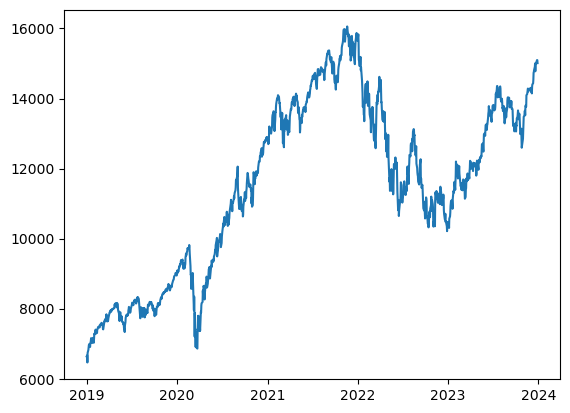

In [35]:
x = df_market['Date']
y = df_market['Adj Close']
plt.plot(x,y)

In [37]:
df_martet_return.to_pickle("return/market return.pkl.zip",compression='zip')
df_return.to_pickle("return/stock return.pkl.zip",compression='zip')

In [38]:
df_martet_return

,Date,market
1,2019-01-02,0.462078
2,2019-01-03,-3.036930
3,2019-01-04,4.260228
4,2019-01-07,1.255559
5,2019-01-08,1.077601
...,...,...
1254,2023-12-22,0.194466
1255,2023-12-26,0.544259
1256,2023-12-27,0.163251
1257,2023-12-28,-0.026757
